# A data analysis and spatial mapping of 2006-2018 NYC arrests
### [Anthony Xiang](http://www.github.com/anthonyxiang1)

Taking a look at dates, demographics, and locations of arrests in NYC &ndash; both generally and over time &ndash; with pandas, seaborn, and folium libraries.

## [Table of Contents] <a name="top"></a>
1. [Initial Exploration](#introduction)
2. [Data Cleaning](#paragraph1)
    1. [Change data types](#subparagraph1)
    2. [Handling NA values](#subparagraph2)
3. [Inspecting Available Data / Simple Analysis](#paragraph2)
    1. [Offense](#subparagraph3)
    2. [Borough](#subparagraph4)
    3. [Age](#subparagraph5)
    4. [Gender](#subparagraph6)
    5. [Race](#subparagraph7)
    6. [Latitude/Longitude](#subparagraph8)
    7. [Date](#subparagraph9)
4. [Exploratory Data Analysis](#paragraph4)
    1. [Offense and Borough](#subparagraph4-1)
    2. [Offense and Sex](#subparagraph4-2)
    3. [Offense and Age Group](#subparagraph4-3)
    4. [Gender and Borough arrest count](#subparagraph4-4)
    5. [Gender and Age Group for each Borough](#subparagraph4-5)
    6. [Race Proportion Comparison](#subparagraph4-6)
5. [Time Series Analysis](#paragraph5)
    1. [Yearly](#subparagraph5-1)
    2. [Monthly](#subparagraph5-2)
    3. [Impaired Driving Arrests by Year](#subparagraph5-3)
    4. [Drug Arrests by Year](#subparagraph5-4)
    5. [Arrest Rates by Borough](#subparagraph5-5)
6. [Spatial Mapping](#paragraph6)
    1. [All Arrests](#subparagraph6-1)
    2. [Heatmap](#subparagraph6-2)
    3. [Interactive Plot](#subparagraph6-3)
    4. [Cluster Plot](#subparagraph6-4)
7. [Decision Tree](#paragraph7)
8. [Limitations](#paragraph8)
9. [Conclusion](#paragraph9)

## Initial Exploration  <a name="introduction"></a>
[Back to top](#top)

We have data from 2006 to 2018, all cases in the year.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from matplotlib.colors import LogNorm
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
df = pd.read_csv(r'C:\Users\antho\OneDrive\Documents\NYCArrests.csv')

In [2]:
df.shape

(4798339, 18)

In [3]:
df.sort_values(by=['ARREST_DATE'], ascending=False).head(5)

ARREST_KEY ARREST_DATE  PD_CD  \
4551583   191681569  12/31/2018  478.0   
4551669   191701416  12/31/2018  339.0   
4551662   191681571  12/31/2018  905.0   
4551663   191691980  12/31/2018  113.0   
4551664   191692013  12/31/2018  748.0   

                                            PD_DESC  KY_CD  \
4551583             THEFT OF SERVICES, UNCLASSIFIED  343.0   
4551669  LARCENY,PETIT FROM OPEN AREAS,UNCLASSIFIED  341.0   
4551662                 INTOXICATED DRIVING,ALCOHOL  347.0   
4551663                       MENACING,UNCLASSIFIED  344.0   
4551664                           CONTEMPT,CRIMINAL  359.0   

                                      OFNS_DESC    LAW_CODE LAW_CAT_CD  \
4551583         OTHER OFFENSES RELATED TO THEFT  PL 1651503          M   
4551669                           PETIT LARCENY  PL 1552500          M   
4551662          INTOXICATED & IMPAIRED DRIVING  VTL11920U3          M   
4551663            ASSAULT 3 & RELATED OFFENSES  PL 1201401          M   
4551664  OFFENSES AGAINST PUBLIC ADMINISTRATION  PL 2155002          M   

        ARREST_BORO  ARREST_PRECINCT  JURISDICTION_CODE AGE_GROUP PERP_SEX  \
4551583           Q              103                6.0     18-24        M   
4551669           M               18                0.0     18-24        M   
4551662           Q              113                0.0     25-44        M   
4551663           B               45                0.0     25-44        M   
4551664           M               32                0.0     25-44        M   

              PERP_RACE  X_COORD_CD  Y_COORD_CD   Latitude  Longitude  
4551583           BLACK   1037598.0    194471.0  40.700302 -73.807603  
4551669           BLACK    991531.0    217373.0  40.763320 -73.973718  
4551662           BLACK   1049338.0    187649.0  40.681499 -73.765329  
4551663  WHITE HISPANIC   1032930.0    239207.0  40.823118 -73.824114  
4551664           BLACK    999428.0    236544.0  40.815930 -73.945167

In [4]:
df.sort_values(by=['ARREST_DATE'], ascending=False).tail(5)

ARREST_KEY ARREST_DATE  PD_CD  \
4551199     9958067  01/01/2006  759.0   
4551198     9930330  01/01/2006  503.0   
4551197     9930318  01/01/2006  101.0   
4551196     9930309  01/01/2006  198.0   
4551159     9927086  01/01/2006  961.0   

                                          PD_DESC  KY_CD  \
4551199  PUBLIC ADMINISTATION,UNCLASS MISDEMEAN 4  359.0   
4551198     CONTROLLED SUBSTANCE,INTENT TO SELL 3  117.0   
4551197                                 ASSAULT 3  344.0   
4551196                       CRIMINAL CONTEMPT 1  126.0   
4551159                            SIGNAL,FAIL TO  881.0   

                                      OFNS_DESC    LAW_CODE LAW_CAT_CD  \
4551199  OFFENSES AGAINST PUBLIC ADMINISTRATION  PL 1950500          M   
4551198                         DANGEROUS DRUGS  PL 2201601          F   
4551197            ASSAULT 3 & RELATED OFFENSES  PL 1200001          M   
4551196                 MISCELLANEOUS PENAL LAW  PL 21551B5          F   
4551159                OTHER TRAFFIC INFRACTION  VTL116300A          I   

        ARREST_BORO  ARREST_PRECINCT  JURISDICTION_CODE AGE_GROUP PERP_SEX  \
4551199           B               41               72.0     25-44        M   
4551198           S              120                0.0       <18        M   
4551197           S              120                0.0     18-24        F   
4551196           Q              101                0.0     18-24        M   
4551159           Q              112                0.0     25-44        M   

              PERP_RACE  X_COORD_CD  Y_COORD_CD   Latitude  Longitude  
4551199           BLACK   1017934.0    232221.0  40.804013 -73.878332  
4551198           BLACK    954652.0    170721.0  40.635225 -74.106642  
4551197           BLACK    959914.0    162076.0  40.611512 -74.087652  
4551196  WHITE HISPANIC   1051464.0    159247.0  40.603526 -73.757947  
4551159  WHITE HISPANIC   1025420.0    202485.0  40.722364 -73.851474

## Data Cleaning <a name="paragraph1"></a>
[Back to top](#top)

our analysis will focus on arrest date, offense, demographics (age group, sex, race), and latitude/longitude - let's drop some columns that we don't need.

In [5]:
df.drop(df.columns[[0,2,3,4,6,7,10,14,15]], axis=1, inplace=True)

df.head()

ARREST_DATE                        OFNS_DESC ARREST_BORO  ARREST_PRECINCT  \
0  12/31/2017          MISCELLANEOUS PENAL LAW           Q              105   
1  12/31/2017  OTHER OFFENSES RELATED TO THEFT           Q              114   
2  12/31/2017                 OTHER STATE LAWS           K               73   
3  12/31/2017     ASSAULT 3 & RELATED OFFENSES           M               18   
4  12/31/2017     ASSAULT 3 & RELATED OFFENSES           M               18   

  AGE_GROUP PERP_SEX                 PERP_RACE   Latitude  Longitude  
0     25-44        M                     BLACK  40.735772 -73.715638  
1     25-44        M  ASIAN / PACIFIC ISLANDER  40.769437 -73.910241  
2     18-24        M                     BLACK  40.679525 -73.904572  
3     25-44        M                     WHITE  40.763523 -73.987074  
4     45-64        M                     BLACK  40.759768 -73.989811

### Change data types <a name="subparagraph1"></a>

Change arrest date to datetime object.

In [6]:
df.iloc[:,0] = pd.to_datetime(df.iloc[:,0], format="%m/%d/%Y")
df.dtypes

ARREST_DATE        datetime64[ns]
OFNS_DESC                  object
ARREST_BORO                object
ARREST_PRECINCT             int64
AGE_GROUP                  object
PERP_SEX                   object
PERP_RACE                  object
Latitude                  float64
Longitude                 float64
dtype: object

### Handling NA values <a name="subparagraph2"></a>

In [7]:
df.isna().sum()

ARREST_DATE           0
OFNS_DESC          8870
ARREST_BORO           8
ARREST_PRECINCT       0
AGE_GROUP            17
PERP_SEX              0
PERP_RACE             0
Latitude              1
Longitude             1
dtype: int64

In [8]:
df[df['Latitude'].isna()]
df = df.drop([3986591])

In [9]:
dfArrestNA = df[df['ARREST_BORO'].isna()]

# we can fill in these boroughs manually using the latitudes and longitudes

dfArrestNA = dfArrestNA.assign(ARREST_BORO = ['M', 'M', 'M', 'K', 'K', 'B', 'M', 'M'])

In [10]:
df = dfArrestNA.combine_first(df)

In [11]:
df.isna().sum()

ARREST_DATE           0
OFNS_DESC          8870
ARREST_BORO           0
ARREST_PRECINCT       0
AGE_GROUP            17
PERP_SEX              0
PERP_RACE             0
Latitude              0
Longitude             0
dtype: int64

In [12]:
dfFirstClean = df
dfFirstClean.shape

(4798338, 9)

## Inspecting Available Data / Simple Analysis <a name="paragraph2"></a>
[Back to top](#top)

Questions to answer:


1. How many male arrests were there?
2. Which borough had the most arrests?
3. What demographic is arrested the most?

### Offense <a name="subparagraph3"></a>

We find that the biggest crime in New York City is drug related, more than doubling the second biggest offense.

<strong>Interesting</strong>: 12 people were arrested for fortune telling.

In [13]:
offense = dfFirstClean.iloc[:,1].value_counts(dropna=False).reset_index()
offense.columns = ['OFNS_DESC', 'count']

offense.head()

OFNS_DESC    count
0                  DANGEROUS DRUGS  1056377
1     ASSAULT 3 & RELATED OFFENSES   459889
2  OTHER OFFENSES RELATED TO THEFT   304191
3                 OTHER STATE LAWS   240418
4                CRIMINAL TRESPASS   196181

Text(0, 0.5, 'Crime Count')

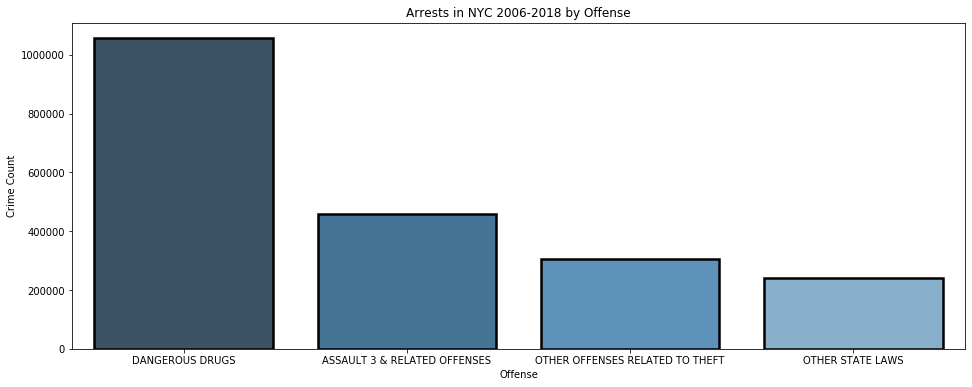

In [14]:
plt.figure(figsize=(16,6))
sns.barplot(x = 'OFNS_DESC', y='count', data=offense[0:4], palette="Blues_d", linewidth=2.5, edgecolor="0")
plt.title('Arrests in NYC 2006-2018 by Offense')
plt.xlabel('Offense')
plt.ylabel('Crime Count')

### Borough <a name="subparagraph4"></a>

Brooklyn has the most offenses, closely followed by Manhattan. Staten Island has far less.

Finding the arrest rate (arrest / population) using average arrests over 13 years and population (from Wikipedia, 2017), we see that Manhattan has the highest arrest rate, followed by the Bronx.

This is not the most accurate estimation, but we will later look at yearly arrest rates by borough.

In [15]:
dfFirstClean['ARREST_BORO'].replace('M', 'Manhattan', inplace=True)
dfFirstClean['ARREST_BORO'].replace('K', 'Brooklyn', inplace=True)
dfFirstClean['ARREST_BORO'].replace('B', 'Bronx', inplace=True)
dfFirstClean['ARREST_BORO'].replace('Q', 'Queens', inplace=True)
dfFirstClean['ARREST_BORO'].replace('S', 'Staten Island', inplace=True)

In [16]:
borough = dfFirstClean.iloc[:,2].value_counts(dropna=False).reset_index()
borough.columns = ['ARREST_BORO', 'count']

borough['population2017'] = [2648771, 1664727, 1471160, 2358582, 479458]
borough['arrestRateAvg'] = borough['count'] / 13 / borough['population2017']

borough

ARREST_BORO    count  population2017  arrestRateAvg
0       Brooklyn  1334916         2648771       0.038767
1      Manhattan  1303791         1664727       0.060245
2          Bronx  1097368         1471160       0.057378
3         Queens   895902         2358582       0.029219
4  Staten Island   166361          479458       0.026691

Text(0, 0.5, 'Crime Count')

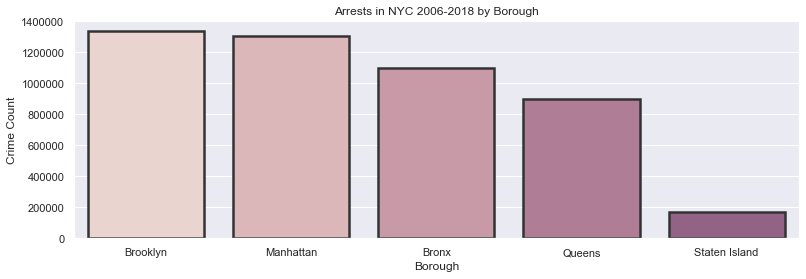

In [17]:
plt.figure(figsize=(13,4))
sns.set(style="darkgrid")
sns.barplot(x = 'ARREST_BORO', y='count', data=borough, palette=sns.cubehelix_palette(8), linewidth=2.5, edgecolor=".2")
plt.title('Arrests in NYC 2006-2018 by Borough')
plt.xlabel('Borough')
plt.ylabel('Crime Count')

### Age <a name="subparagraph5"></a>

We have some weird inputs here (3 digit ages??). Let's focus on the first 5 age groups.

We see an interesting bell curve, where most arrests are of middle ages 24-44.

In [18]:
dfFirstClean.iloc[:,4].value_counts(dropna=False).head(10)

25-44    2202168
18-24    1274229
45-64     880740
<18       402008
65+        38998
NaN           17
895           13
894            7
935            7
945            7
Name: AGE_GROUP, dtype: int64

In [19]:
dfFirstClean = dfFirstClean[(dfFirstClean['AGE_GROUP'] == '25-44') | (dfFirstClean['AGE_GROUP'] == '18-24') |
           (dfFirstClean['AGE_GROUP'] == '45-64') | (dfFirstClean['AGE_GROUP'] == '<18') |
           (dfFirstClean['AGE_GROUP'] == '65+')]

age = dfFirstClean.iloc[:,4].value_counts(dropna=False).reset_index()
age.columns = ['AGE_GROUP', 'count']

age

AGE_GROUP    count
0     25-44  2202168
1     18-24  1274229
2     45-64   880740
3       <18   402008
4       65+    38998

Text(0, 0.5, 'Crime Count')

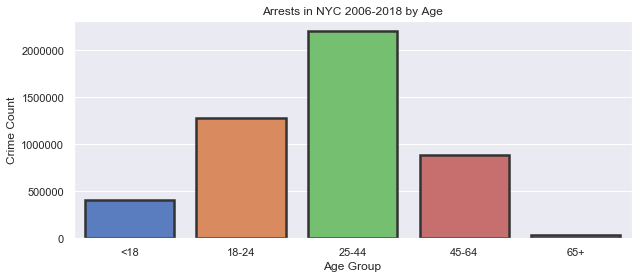

In [20]:
plt.figure(figsize=(10,4))
sns.set(style="darkgrid")
sns.barplot(x = 'AGE_GROUP', y='count', data=age, palette="muted", linewidth=2.5, edgecolor=".2", order=['<18', '18-24', '25-44', '45-64', '65+'])
plt.title('Arrests in NYC 2006-2018 by Age')
plt.xlabel('Age Group')
plt.ylabel('Crime Count')

### Gender <a name="subparagraph6"></a>

Males commit almost 5 times as many crimes as females in the dataset.

In [21]:
gender = dfFirstClean.iloc[:,5].value_counts(dropna=False).reset_index()
gender.columns = ['GENDER', 'count']

gender

GENDER    count
0      M  3996087
1      F   802056

Text(0, 0.5, 'Crime Count')

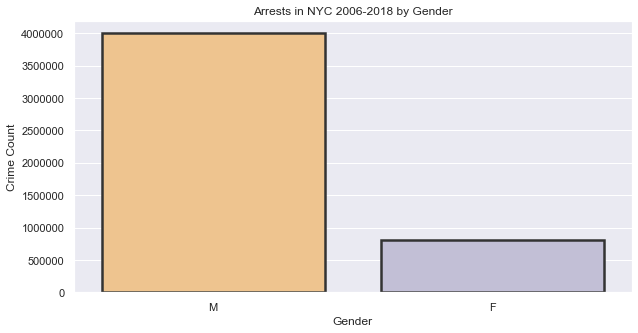

In [22]:
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
sns.barplot(x = 'GENDER', y='count', data=gender, palette="PuOr", linewidth=2.5, edgecolor=".2")
plt.title('Arrests in NYC 2006-2018 by Gender')
plt.xlabel('Gender')
plt.ylabel('Crime Count')

### Race <a name="subparagraph7"></a>

We see that black and white hispanics are the biggest racial groups being arrested. This is disproportionate to the percent of the demographic in NYC. We will investigate this later.

In [23]:
race = dfFirstClean.iloc[:,6].value_counts(dropna=False).reset_index()
race.columns = ['RACE', 'count']

race

RACE    count
0                           BLACK  2330829
1                  WHITE HISPANIC  1249817
2                           WHITE   579397
3                  BLACK HISPANIC   384270
4        ASIAN / PACIFIC ISLANDER   193093
5                         UNKNOWN    48921
6  AMERICAN INDIAN/ALASKAN NATIVE    10453
7                           OTHER     1363

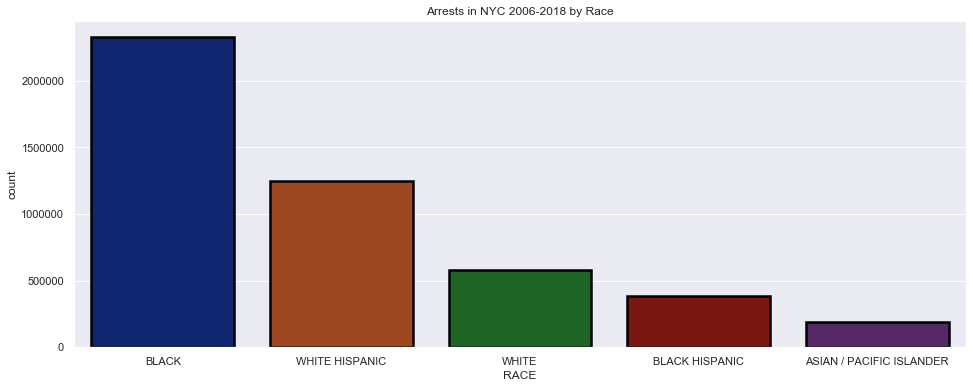

In [24]:
plt.figure(figsize=(16,6))
plt.title('Arrests in NYC 2006-2018 by Race')
plt.xlabel('Race')
plt.ylabel('Crime Count')
sns.set(style="darkgrid")
sns.barplot(x = 'RACE', y='count', data=race[0:5], palette="dark", linewidth=2.5, edgecolor="0")

### Latitude/Longitude <a name="subparagraph8"></a>

Latitude max is abnormally high (the most eastern part of NYC is around 40.75 degrees). We see that there are actually a lot of values that are not in the NYC latitude/longitude range (over 2 million). We can't do much to gain that information otherwise, so we will have to settle with the accurate spatial points.

In [25]:
df.describe()

ARREST_PRECINCT      Latitude     Longitude
count     4.798338e+06  4.798338e+06  4.798338e+06
mean      6.054391e+01  4.075731e+01 -7.392378e+01
std       3.427400e+01  4.551971e-01  7.194385e-02
min       1.000000e+00  4.049891e+01 -7.425494e+01
25%       3.300000e+01  4.067967e+01 -7.396705e+01
50%       5.200000e+01  4.074196e+01 -7.392549e+01
75%       8.400000e+01  4.081609e+01 -7.388618e+01
max       1.230000e+02  6.208307e+01 -7.368178e+01

In [26]:
len(df[df['Latitude'] > 40.75].sort_values(by='Latitude'))

2232342

### Date <a name="subparagraph9"></a>

<strong> That is really neat! The days with the least arrests are often near Christmas time. 12 of the 20 days of least arrests are on Christmas. This is interesting because crime often spikes during the holiday season. My guess is that NYC police are less present or more lenient during the holidays.  </strong>

In [27]:
date = dfFirstClean.iloc[:,0].value_counts(dropna=False).reset_index()
date.columns = ['DATE', 'count']

date.tail(20)

DATE  count
4728 2016-01-24    230
4729 2010-12-26    224
4730 2014-12-24    224
4731 2017-03-14    217
4732 2008-12-25    216
4733 2007-12-25    214
4734 2016-12-25    213
4735 2014-12-31    212
4736 2011-12-25    211
4737 2018-11-22    199
4738 2018-12-25    197
4739 2012-12-25    196
4740 2009-12-25    195
4741 2015-12-25    185
4742 2010-12-25    171
4743 2017-12-25    161
4744 2012-10-29    150
4745 2006-12-25    138
4746 2014-12-25    136
4747 2010-12-27     91

In [28]:
dfFullClean = dfFirstClean.dropna()

## Exploratory Data Analysis <a name="paragraph4"></a>

[Back to top](#top)

Questions to answer:
1. What are the most common offenses by borough, sex, age, race? How do they differ between groups?
2. How do the two genders compare by borough, age, race?



We have dfFirstClean - with NA values in offense - and dfFullClean which is fully cleaned. We will use the cleaned dataset from now on so that we have no interfering missing values.

In [29]:
dfFullClean.head()

ARREST_DATE                        OFNS_DESC ARREST_BORO  ARREST_PRECINCT  \
0  2017-12-31          MISCELLANEOUS PENAL LAW      Queens            105.0   
1  2017-12-31  OTHER OFFENSES RELATED TO THEFT      Queens            114.0   
2  2017-12-31                 OTHER STATE LAWS    Brooklyn             73.0   
3  2017-12-31     ASSAULT 3 & RELATED OFFENSES   Manhattan             18.0   
4  2017-12-31     ASSAULT 3 & RELATED OFFENSES   Manhattan             18.0   

  AGE_GROUP PERP_SEX                 PERP_RACE   Latitude  Longitude  
0     25-44        M                     BLACK  40.735772 -73.715638  
1     25-44        M  ASIAN / PACIFIC ISLANDER  40.769437 -73.910241  
2     18-24        M                     BLACK  40.679525 -73.904572  
3     25-44        M                     WHITE  40.763523 -73.987074  
4     45-64        M                     BLACK  40.759768 -73.989811

### Offense and Borough <a name="subparagraph4-1"></a>

Observations:

1. The most common offenses throughout NYC are drug arrests
2. Boroughs with most robbery/burglary are Bronx and Brooklyn
3. Driving crimes occur most often in Queens - reasonable as there is more driving activity there

Text(0.5, 1, 'Offenses by Borough')

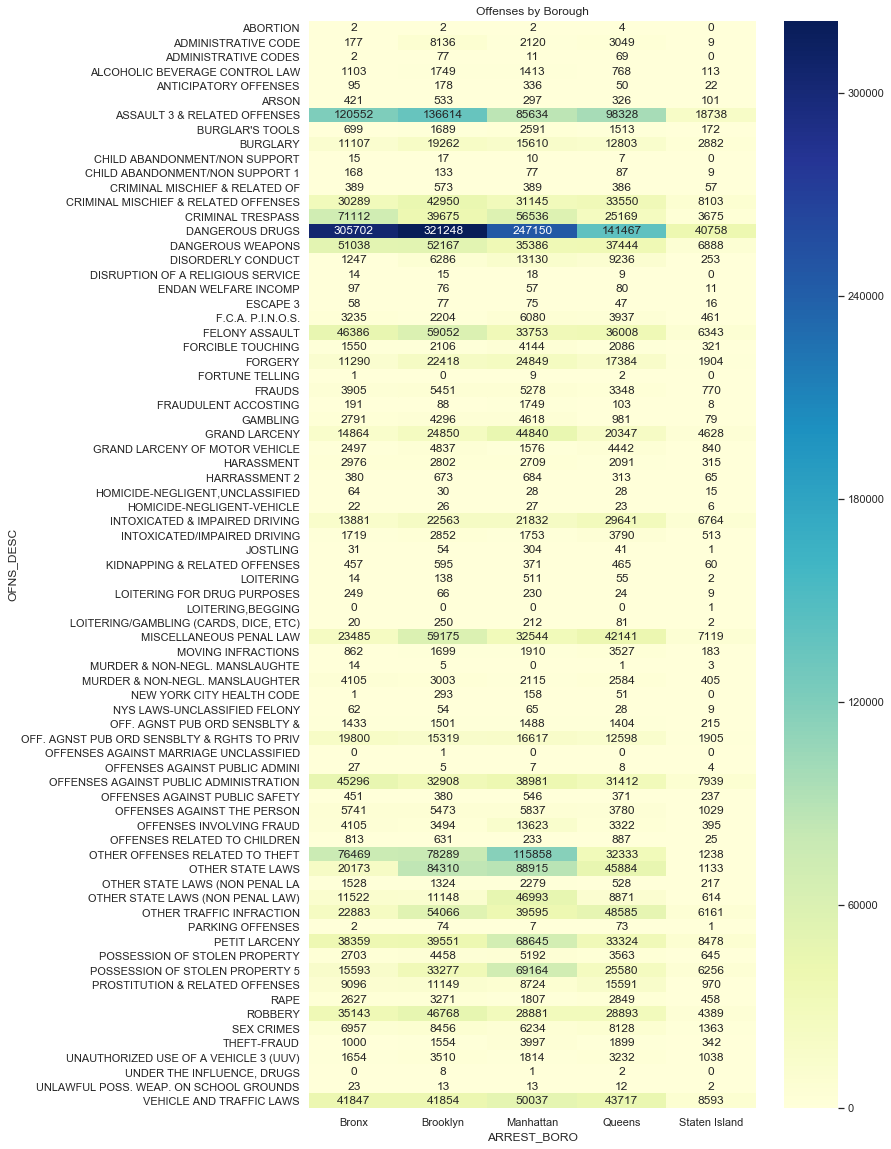

In [30]:
heatmap_boro = pd.crosstab(dfFullClean['OFNS_DESC'], dfFullClean['ARREST_BORO'])

sns.set(rc={'figure.figsize':(10,20)})
sns.heatmap(heatmap_boro, cmap="YlGnBu", annot=True, fmt='g').set_title('Offenses by Borough')

### Offense and Sex <a name="subparagraph4-2"></a>

We will use normalized values for each sex to find out what are the most common offenses for each gender. We expect some offenses will be very different.

Observations:

1. High percentage of 3rd degree assault and felony assault in female arrests
2. Female arrests are more likely low level crimes (petit larceny, possession of stolen property) whereas male arrests are higher risk (weapons and theft)

Text(0.5, 1, 'Offenses by Sex')

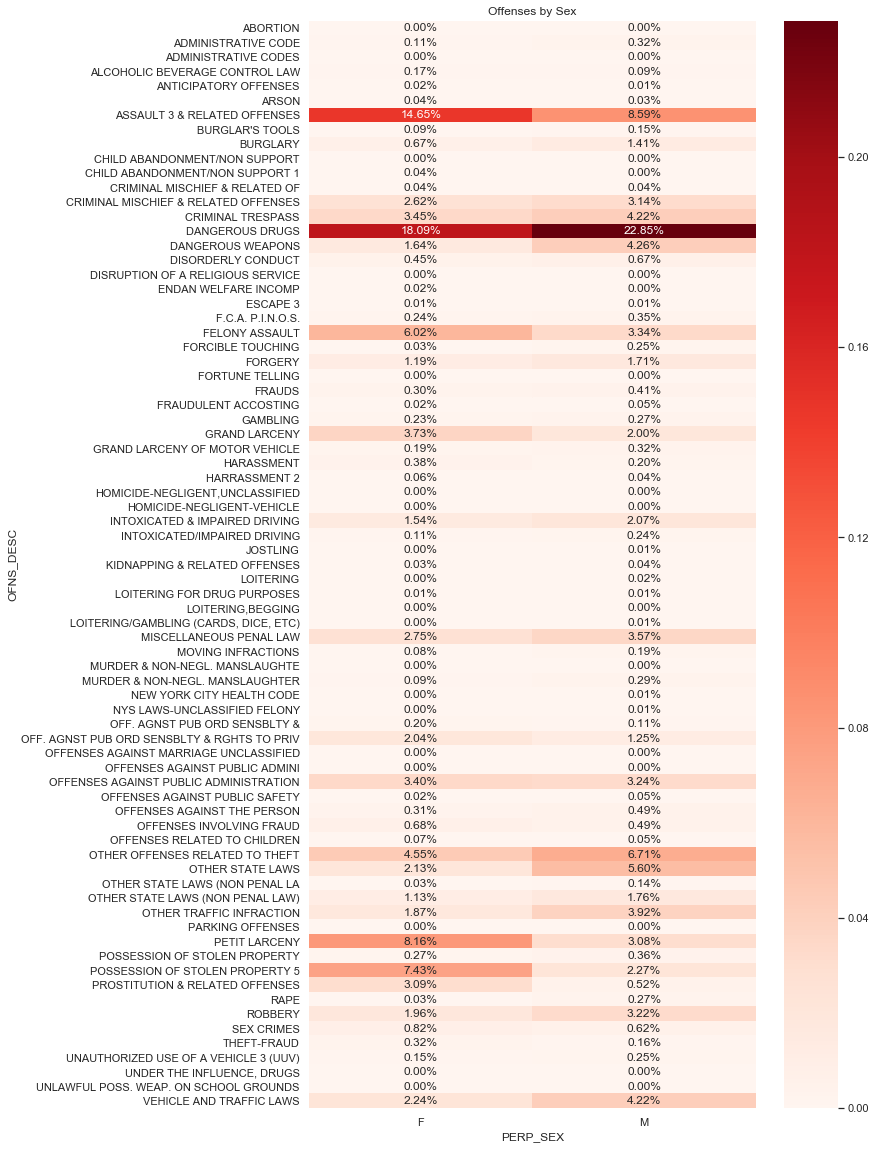

In [31]:
heatmap_gender = pd.crosstab(dfFullClean['OFNS_DESC'], dfFullClean['PERP_SEX'])

for i in range(len(heatmap_gender.columns)):
    heatmap_gender.iloc[:,i] = heatmap_gender.iloc[:,i] / heatmap_gender.iloc[:,i].sum()
    
sns.set(rc={'figure.figsize':(10,20)})
sns.heatmap(heatmap_gender, cmap="Reds", annot=True, fmt='.2%').set_title('Offenses by Sex')

### Offense and Age Group <a name="subparagraph4-3"></a>

Normalizing again, our observations:

1. Most common offenses throughout are drugs and assaults
2. Reasonably, for <18 age group, drugs and stealing crimes (robbery, larceny, theft) are most common





Text(0.5, 1, 'Offenses by Age Group')

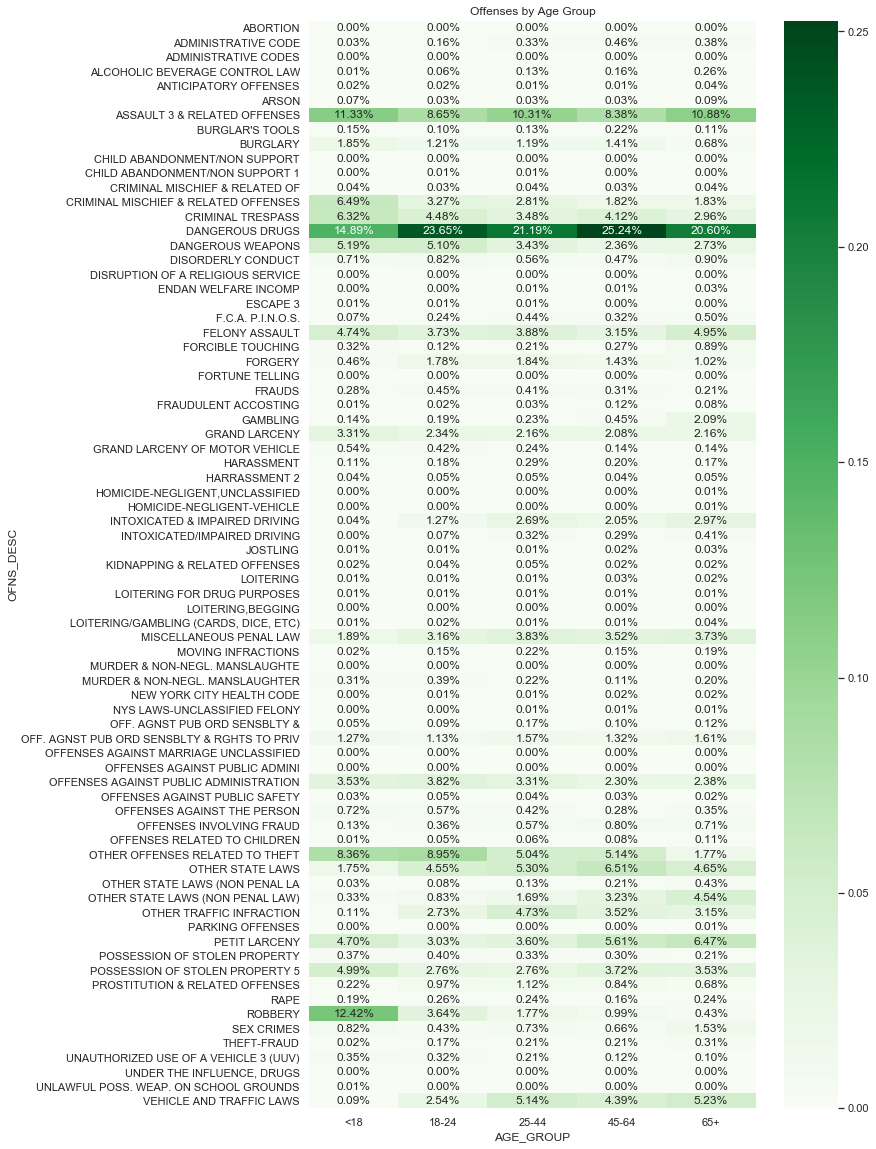

In [32]:
heatmap_age = pd.crosstab(dfFullClean['OFNS_DESC'], dfFullClean['AGE_GROUP'])

for i in range(len(heatmap_age.columns)):
    heatmap_age.iloc[:,i] = heatmap_age.iloc[:,i] / heatmap_age.iloc[:,i].sum()

#move <18 group to the front
heatmap_age = heatmap_age[['<18', '18-24', '25-44', '45-64', '65+']]

sns.set(rc={'figure.figsize':(10,20)})
sns.heatmap(heatmap_age, cmap="Greens", annot=True, fmt='.2%').set_title('Offenses by Age Group')

### Gender and Borough arrest count <a name="subparagraph4-4"></a>

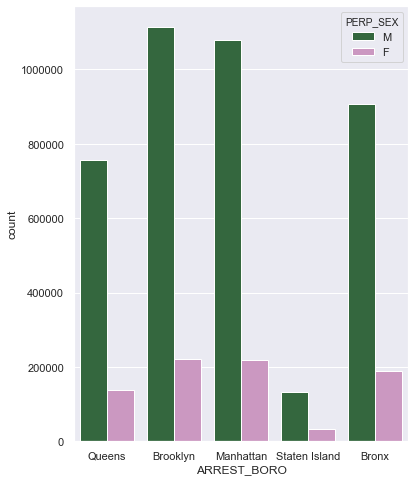

In [33]:
sns.set(rc={'figure.figsize':(6,8)})
sns.countplot(x="ARREST_BORO", hue="PERP_SEX", data=dfFullClean, palette=sns.color_palette("cubehelix", 2))

### Gender and Age Group for each Borough <a name="subparagraph4-5"></a>

Ratios between men and women arrests are pretty consistent throughout the city and age group.

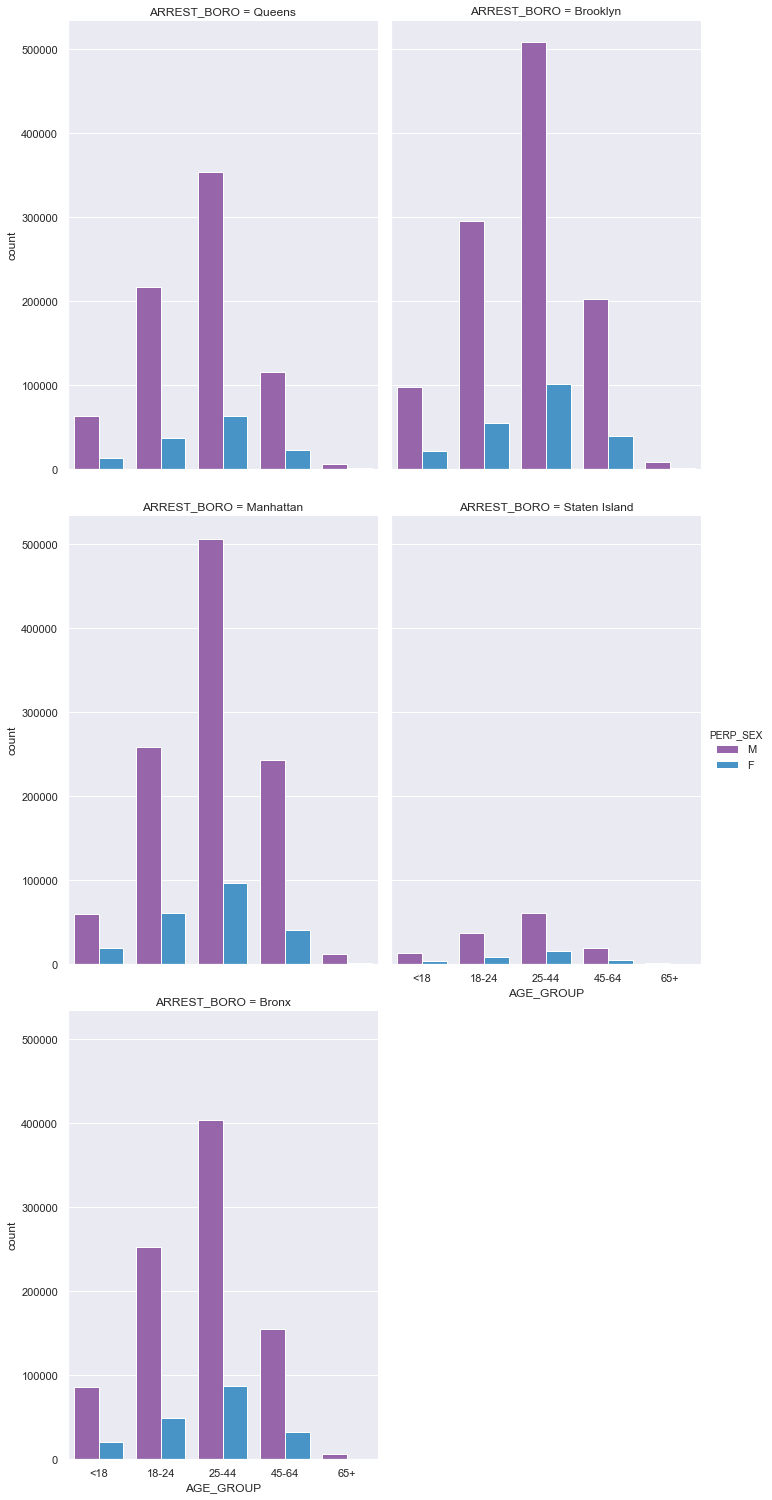

In [34]:
sns.catplot(x="AGE_GROUP", hue="PERP_SEX", order=['<18', '18-24', '25-44', '45-64', '65+'],
                col="ARREST_BORO", data=dfFullClean, kind="count", col_wrap=2, height=7, aspect=.7, palette=["#9b59b6", "#3498db"]);

### Race Proportion Comparison <a name="subparagraph4-6"></a>

Comparing the proportion of races in arrest dataset vs. the proportion of the population in NYC.

Text(0.5, 1.0, 'Relative Proportion of Arrest Victims vs. Population')

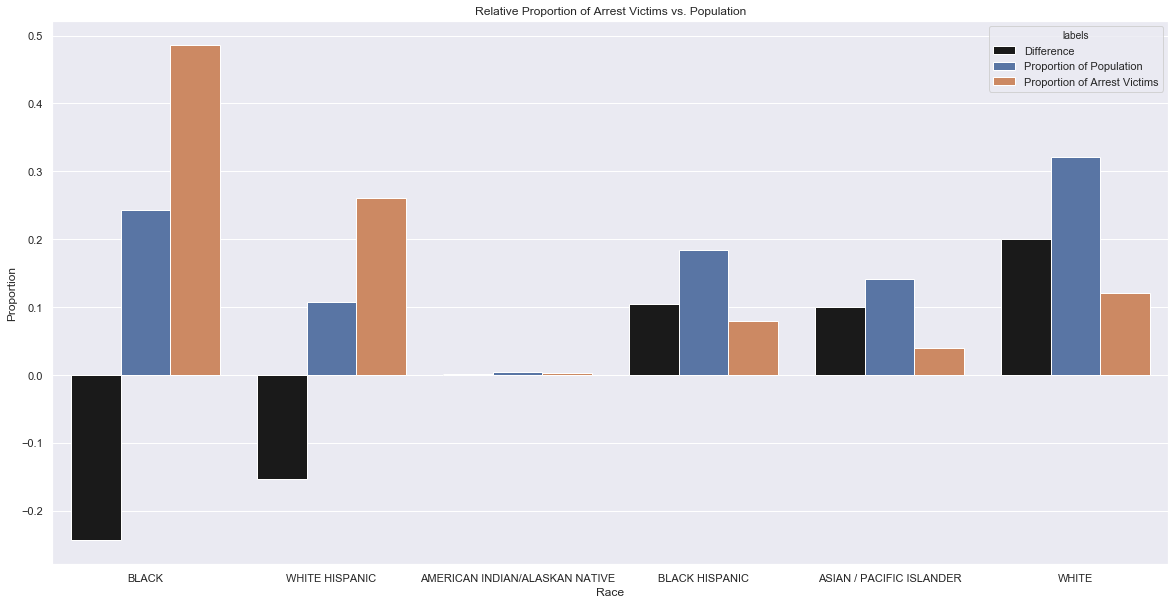

In [35]:
race_df = dfFullClean.iloc[:,6].value_counts(dropna=False).reset_index()
race_df.columns = ['RACE', 'Proportion of Arrest Victims']

race_df['Proportion of Population'] = [.243, .107, .321, .184, .141, 0, .004,0]
race_df['Proportion of Arrest Victims'] = race_df['Proportion of Arrest Victims'] / len(dfFullClean)

race_df['Difference'] = race_df['Proportion of Population'] - race_df['Proportion of Arrest Victims']

race_df = race_df.drop([5,7])

race_df = pd.melt(race_df, id_vars="RACE", var_name="labels", value_name="props")

sns.set(rc={'figure.figsize':(20,10)})
g = sns.barplot(x='RACE',
                y='props',
                hue='labels',
                hue_order=['Difference','Proportion of Population','Proportion of Arrest Victims'], 
                order=['BLACK', 'WHITE HISPANIC','AMERICAN INDIAN/ALASKAN NATIVE',
                       'BLACK HISPANIC','ASIAN / PACIFIC ISLANDER','WHITE'], 
                data=race_df, 
                palette=["k", "C0","C1"])


g.set(xlabel='Race', ylabel='Proportion')
plt.title("Relative Proportion of Arrest Victims vs. Population")


## Time Series Analysis <a name="paragraph5"></a>
[Back to top](#top)

Questions to answer:
1. How did the number of arrests change through the years?
2. What are the trends/patterns within each year? Is there a peak at holidays?
3. Looking at yearly arrest trends for specific crimes - vehicle impairment (is there a peak at holidays/drinking events) and drugs (is there a peak at 4/20)
4. How did the arrest rates change over time by borough?

We use a dictionary to store the dfFullClean dataset into sets of each year. We can dynamically change the indices within the for loop using a dictionary, rather than dynamically creating variables. Now that we are working with smaller datasets, hopefully the maps and plots will be generated faster.

In [36]:
d = {}
for i in range(2006, 2019):
    d['year' + str(i)] = dfFullClean[dfFullClean['ARREST_DATE'].dt.year == i]

### Yearly <a name="subparagraph5-1"></a>

Arrests in NYC have decreased heavily since 2014, cut by more than 150,000 arrests.

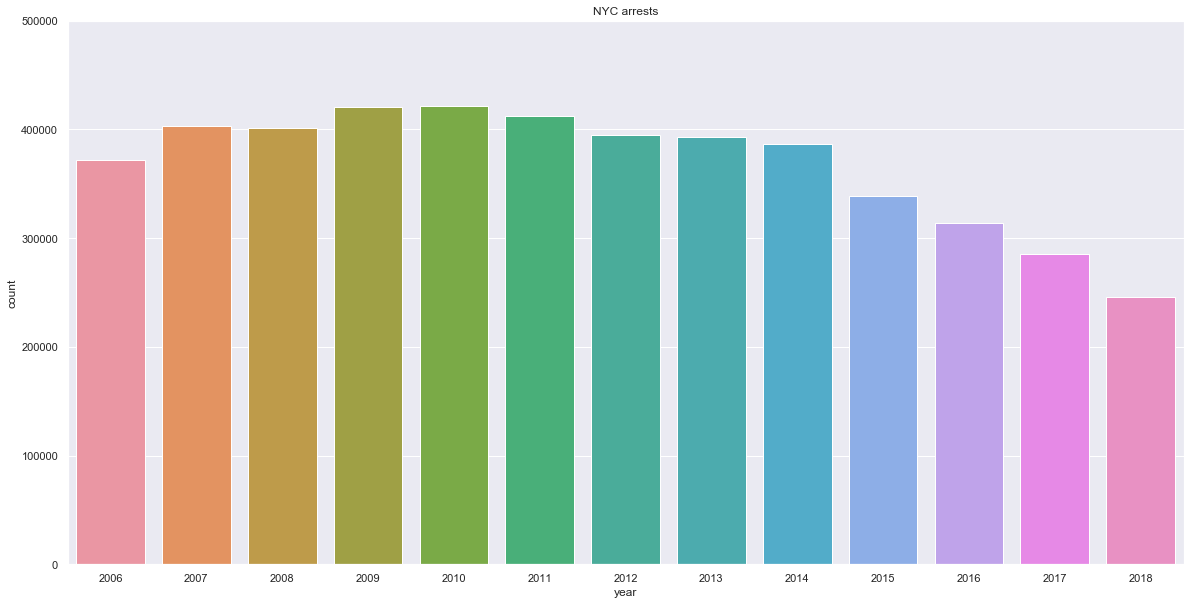

In [37]:
years = [i for i in range(2006, 2019)]
counts = [len(d['year' + str(i)]) for i in range(2006, 2019)]

dictMeta = {'year': years, 'count': counts}

dfMeta = pd.DataFrame(data=dictMeta)

graph = sns.barplot(x="year", y="count", data=dfMeta)
graph.set(ylim=(0,500000))
graph.set(title="NYC arrests")
sns.set(rc={'figure.figsize':(8,13)})

### Monthly <a name="subparagraph5-2"></a>

We use a running average to smoothen out the jagged points on the graph and highlight long term trends. With it, we lose out on the first 10 days of the year. First join columns for a table of counts - keep in mind the NaN values for the leap day.

The indices will be set to year 1900 in order to have it as a datetime object.

Cool! The big dip in 2012 near the end of October stuck out to me - looking online, this is when Hurricane Sandy hit the city. The dip in late December 2010 is also because of a blizzard. Makes sense! It's fascinating to see how these external effects correlate with crime and arrests.

There are many peaks and troughs within each month - suppose it has to do with the day of the week? Looking into the data, there doesn't seem to be a specific pattern with the day of the week.

We see that in earlier years arrest numbers fluctuate a lot more. This could be related to the police duty scheduling moreso than the tendency for crime to be committed on a specific day.

In [38]:
def formatYearly(dictionary):
    temp_df = pd.DataFrame()
    
    for key in dictionary:
        temp = dictionary[key].iloc[:,0].value_counts(dropna=False).reset_index()
        temp.columns = ['ARREST_DATE', f"yr{key[4:]}"]

        temp = temp.sort_values(by='ARREST_DATE')
        temp = temp.set_index(temp['ARREST_DATE'].astype(str).str[5:])
        temp.drop(temp.columns[[0]], axis=1, inplace=True)

        if temp_df.empty:
            temp_df = temp
        else:
            temp_df = temp_df.merge(temp, how='outer', left_index=True, right_index=True)
            
    return temp_df

In [39]:
yearly_df = formatYearly(d)
yearly_df.index = pd.to_datetime(yearly_df.index, format="%m-%d", errors='coerce')

c:\users\antho\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


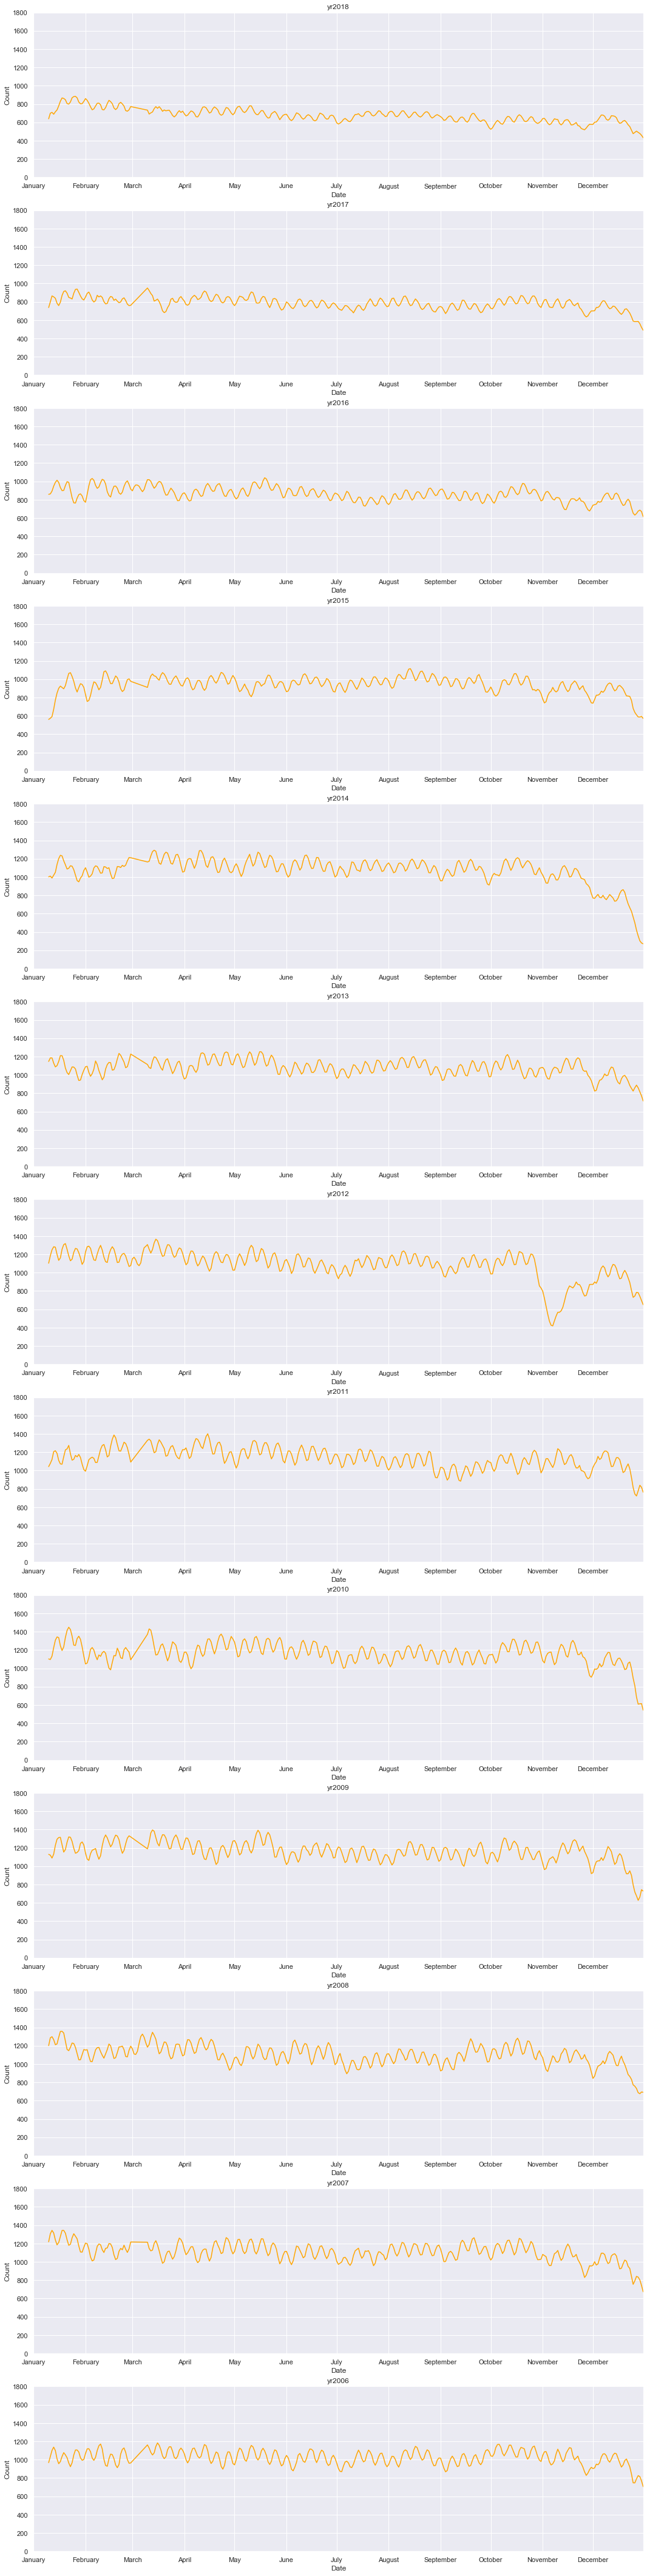

In [40]:
axes = ('ax2006', 'ax2007', 'ax2008', 'ax2009', 'ax2010', 'ax2011', 'ax2012', 
        'ax2013', 'ax2014', 'ax2015', 'ax2016', 'ax2017', 'ax2018')

fig, axes = plt.subplots(13, 1, figsize=(18, 77))

for i in range(2006, 2019):
    graph = sns.lineplot(x=yearly_df.index, y=f"yr{i}", color="orange", data=yearly_df.rolling(10).mean(), ax=axes[2005-i])
    graph.set(ylim=(0,1800))
    graph.set(xlim= (datetime.date(1900, 1, 1), datetime.date(1900, 12, 31)))
    graph.set_title(f'yr{i}')
    graph.set(xlabel='Date', ylabel='Count')
    graph.set_xticklabels(["January", "February", "March", "April", 
                           "May","June", "July", "August", "September", "October", "November", "December"])


### Impaired Driving Arrests by Year <a name="subparagraph5-3"></a>

Spikes throughout the years common in early February and early March. April 27, 2013 has a huge spike, reason unknown. The biggest spikes in February correlate with the day of the Super Bowl.

In [41]:
vehicle = {}
for i in range(2006, 2019):
    vehicle['year' + str(i)] = dfFullClean[(dfFullClean['ARREST_DATE'].dt.year == i) & 
                                            (dfFullClean['OFNS_DESC'].str.contains("DRIVING"))]

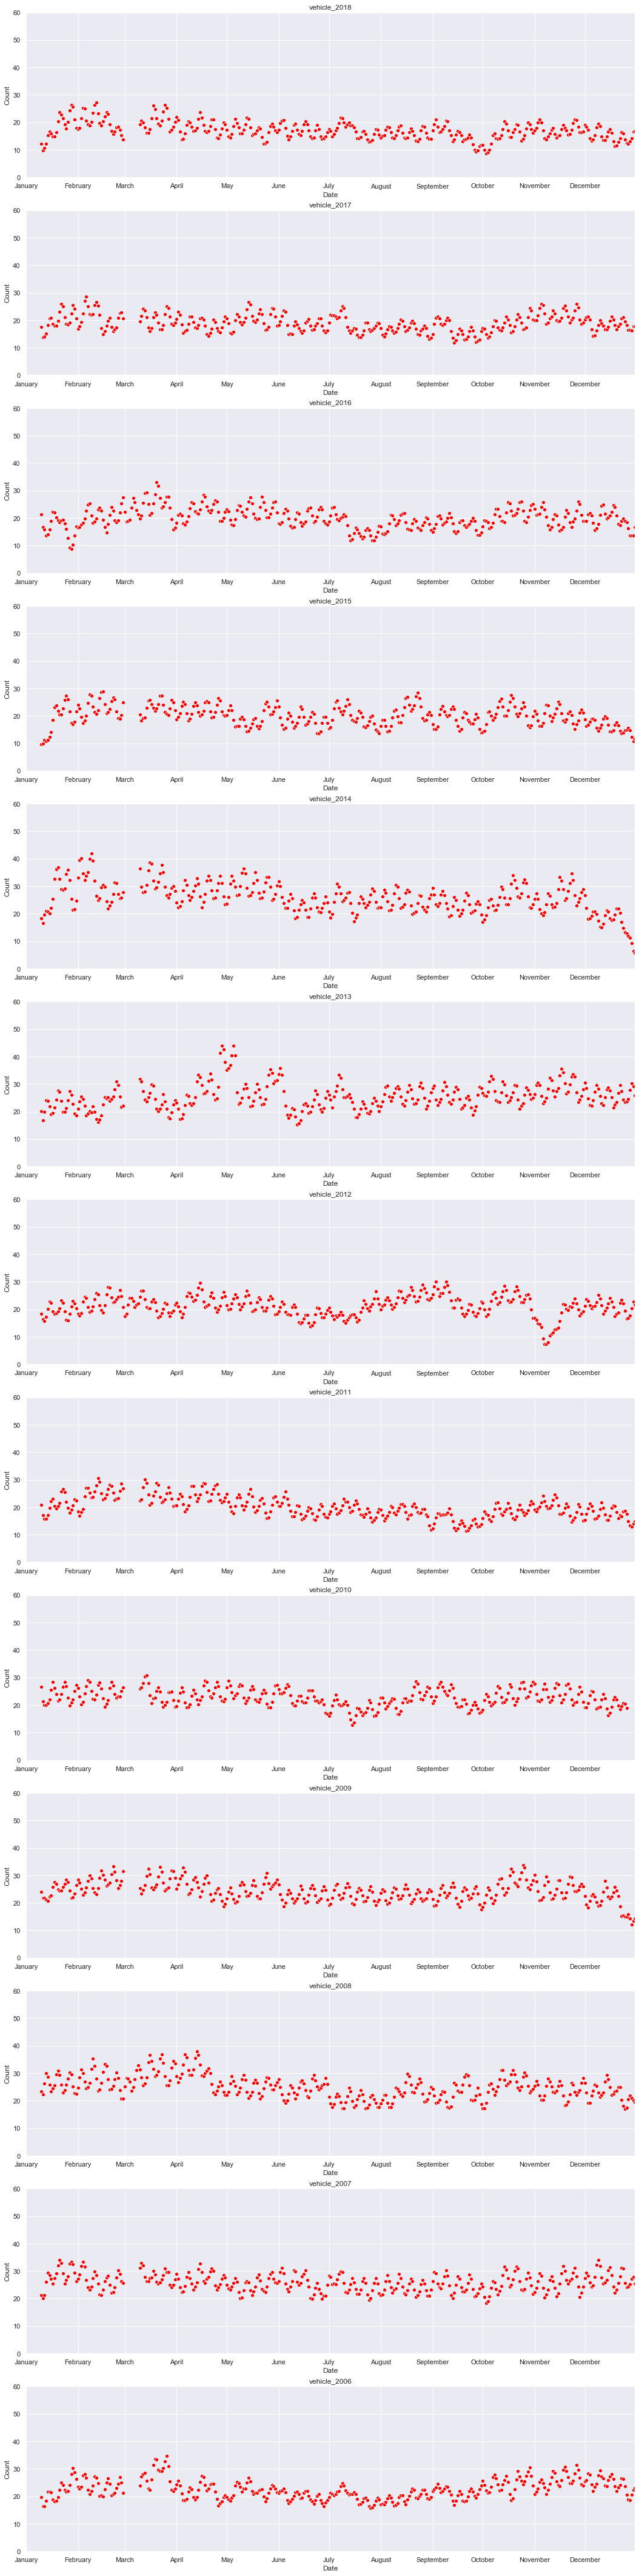

In [42]:
vehicle_df = formatYearly(vehicle)

vehicle_df.index = pd.to_datetime(vehicle_df.index, format="%m-%d", errors='coerce')

axes = ('ax2006', 'ax2007', 'ax2008', 'ax2009', 'ax2010', 'ax2011', 'ax2012', 
        'ax2013', 'ax2014', 'ax2015', 'ax2016', 'ax2017', 'ax2018')

fig, axes = plt.subplots(13, 1, figsize=(18, 77))

for i in range(2006, 2019):
    graph = sns.scatterplot(x=vehicle_df.index, y=f"yr{i}", color="red", data=vehicle_df.rolling(10).mean(), ax=axes[2005-i])
    graph.set(ylim=(0,60))
    graph.set(xlim= (datetime.date(1900, 1, 1), datetime.date(1900, 12, 31)))
    graph.set_title(f'vehicle_{i}')
    graph.set(xlabel='Date', ylabel='Count')
    graph.set_xticklabels(["January", "February", "March", "April", 
                           "May","June", "July", "August", "September", "October", "November", "December"])

### Drug Arrests by Year <a name="subparagraph5-4"></a>

Only recently has 4/20 drug arrests become a local spike.

In [43]:
drug = {}
for i in range(2006, 2019):
    drug['year' + str(i)] = dfFullClean[(dfFullClean['ARREST_DATE'].dt.year == i) & 
                                            (dfFullClean['OFNS_DESC'].str.contains("DRUG"))]
    
drug_df = formatYearly(drug)

drug_df.index = pd.to_datetime(drug_df.index, format="%m-%d", errors='coerce')

drug_df[106:114]


yr2006  yr2007  yr2008  yr2009  yr2010  yr2011  yr2012  yr2013  \
ARREST_DATE                                                                   
1900-04-16     37.0   161.0     420   394.0   401.0   301.0     156   288.0   
1900-04-17    187.0   393.0     345   437.0   371.0   111.0     354   317.0   
1900-04-18    339.0   443.0     310   324.0   136.0   126.0     412   287.0   
1900-04-19    376.0   415.0     224   112.0   143.0   368.0     336   343.0   
1900-04-20    362.0   420.0      95   106.0   461.0   507.0     428   277.0   
1900-04-21    323.0   297.0     144   366.0   415.0   418.0     303   118.0   
1900-04-22    184.0    95.0     342   446.0   361.0   459.0      79   102.0   
1900-04-23     95.0   191.0     435   399.0   465.0   284.0     124   225.0   

             yr2014  yr2015  yr2016  yr2017  yr2018  
ARREST_DATE                                          
1900-04-16    322.0   211.0     171    62.0    42.0  
1900-04-17    250.0   213.0      66   113.0   111.0  
1900-04-18    332.0   175.0      89   163.0   159.0  
1900-04-19    241.0    82.0     110   206.0    99.0  
1900-04-20     68.0    68.0     234   215.0   162.0  
1900-04-21    107.0   204.0     194   193.0   117.0  
1900-04-22    218.0   185.0     196   164.0    52.0  
1900-04-23    323.0   198.0     158    68.0    63.0

### Arrest Rates by Borough <a name="subparagraph5-5"></a>

Using the 2010 census data for population as an estimate. Bronx and Manhattan arrest rates are similar in 2018, so is Queens and Staten Island.

In [44]:
rates = {}

for i in range(2006, 2019):
    rates['year' + str(i)] = dfFullClean[(dfFullClean['ARREST_DATE'].dt.year == i)]

rates_df = pd.DataFrame()

for key in drug:
    temp = rates[key].iloc[:,2].value_counts(dropna=False).reset_index()
    temp.columns = ['ARREST_BORO', f"{key[4:]}"]

    temp = temp.set_index(temp['ARREST_BORO'])
    temp.drop(temp.columns[[0]], axis=1, inplace=True)

    if rates_df.empty:
        rates_df = temp
    else:
        rates_df = rates_df.merge(temp, how='outer', left_index=True, right_index=True)


In [45]:
borough_pop = [1385108, 2504700, 1585873, 2230722,  468730]

for i in range(len(rates_df)):
    rates_df.iloc[[i]] = (rates_df.iloc[[i]] / borough_pop[i])

In [46]:
rates_df = rates_df.T
rates_df

ARREST_BORO     Bronx  Brooklyn  Manhattan    Queens  Staten Island
2006         0.060535  0.041123   0.064510  0.031474       0.026452
2007         0.069077  0.044463   0.069659  0.032810       0.026472
2008         0.069286  0.043551   0.068850  0.032323       0.032006
2009         0.072011  0.046650   0.072177  0.034085       0.029806
2010         0.072466  0.047043   0.071180  0.034223       0.030414
2011         0.069777  0.046978   0.069774  0.032788       0.029915
2012         0.064726  0.045214   0.068207  0.031808       0.027771
2013         0.061704  0.043706   0.068866  0.033986       0.027094
2014         0.061655  0.042552   0.066664  0.033986       0.028319
2015         0.054277  0.037156   0.058976  0.029413       0.023713
2016         0.049690  0.034945   0.053620  0.026990       0.026322
2017         0.045170  0.031930   0.047878  0.024914       0.024263
2018         0.039878  0.027221   0.039264  0.022307       0.022198

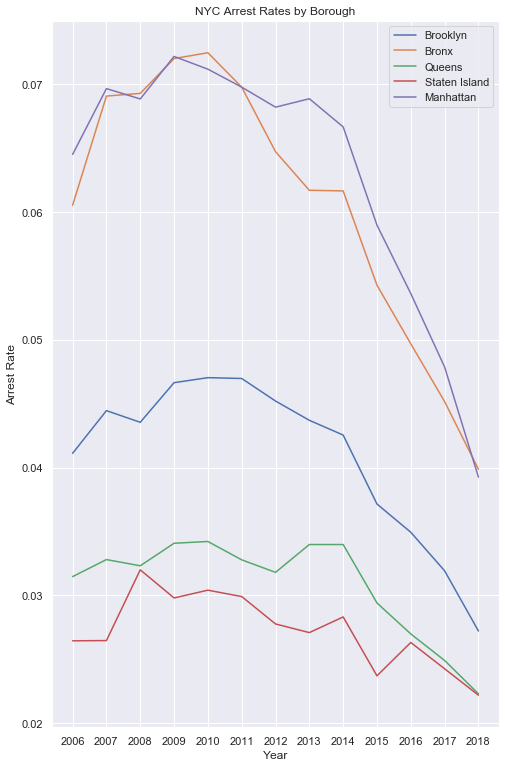

In [47]:
list_data = [rates_df['Brooklyn'], rates_df['Bronx'], rates_df['Queens'], rates_df['Staten Island'], rates_df['Manhattan']]

ax = sns.lineplot(data=list_data, dashes=False)
ax.set(title="NYC Arrest Rates by Borough")
ax.set(xlabel='Year', ylabel='Arrest Rate')
sns.set(rc={'figure.figsize':(15,5)})

## Spatial Mapping <a name="paragraph6"></a>
[Back to top](#top)

The folium maps have trouble rendering the large amount of rows in the datasets.. the largest map only show 20,000 values. There must be better scaling tools for analysis but I enjoyed playing around with folium and making these plots.

Observations:
1. Less crime is committed on the borders of New York City. This is because those areas are more often occupied by affluent residents.
2. The hotspot of crime is located in mid Manhattan.
3. Zooming in on a heatmap, we see hotspots specifically in highly populated locations - Penn Station and Times Square.

### All Arrests <a name="subparagraph6-1"></a>

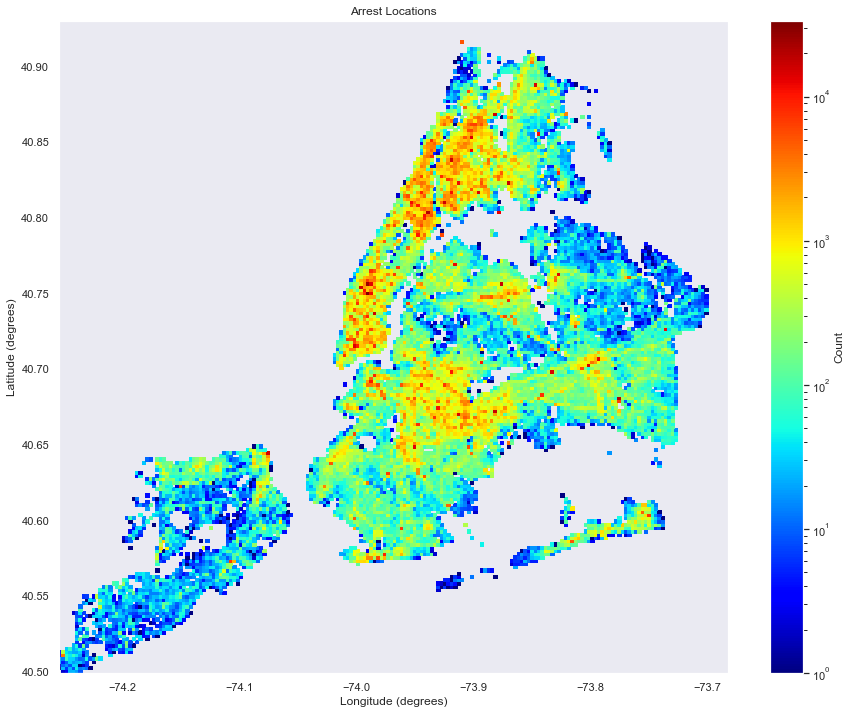

In [48]:
latmin = dfFullClean['Latitude'].min()
lonmin = dfFullClean['Longitude'].min()
latmax = 40.93
lonmax = dfFullClean['Longitude'].max()

fig = plt.figure(1, figsize=(15,12) )
hist = plt.hist2d(dfFullClean['Longitude'],dfFullClean['Latitude'],
                  cmap='jet',bins=200,range=[[lonmin,lonmax],[latmin,latmax]],norm=LogNorm())
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.title('Arrest Locations')
plt.colorbar(label='Count')
plt.show()

### Heatmap - ~13000 values <a name="subparagraph6-2"></a>

Map of Asian/Pacific Islander arrests in 2018. The heatmaps for every 1000 rows overlay each other, so not completely accurate but you can see more color in higher arrest areas.

In [49]:
dfAsian = d['year2018'][(d['year2018']['PERP_RACE'] == 'ASIAN / PACIFIC ISLANDER')]

In [50]:
map = folium.Map(location=[40.738, -73.98], zoom_start=10)

locations = list(zip(dfAsian.Latitude, dfAsian.Longitude))
icons = [folium.Icon(prefix="fa") for _ in range(len(dfAsian))]


for i in range(0,len(dfAsian), 1000):
    map.add_child(HeatMap(dfAsian.iloc[i:i+1000][['Latitude', 'Longitude']].values, radius=15))

map

### Interactive plot - ~800 values <a name="subparagraph6-3"></a>

Map of intoxicated or impaired driving arrests in 2018. Points are, as expected, centered along large roads. Click on each point to see details about that arrest.

In [51]:
dfDriving = d['year2018'][d['year2018']['OFNS_DESC'] == 'INTOXICATED/IMPAIRED DRIVING']

In [52]:
def plotArrest(dataset):
    # generate a new map
    mapDriving = folium.Map(location=[40.738, -73.98],
                            zoom_start=10,
                            tiles=("CartoDB Positron"),
                            width='50%')

    # for each row in the data, add a cicle marker
    for index, row in dataset.iterrows():

        number = 1
        
        # generate the popup message that is shown on click.
        popup_text = "{}<br> age group: {}<br> race: {}<br>"
        popup_text = popup_text.format(row["ARREST_DATE"],row["AGE_GROUP"],row["PERP_RACE"])
        
        # radius of circles
        radius = 1
          
        color="#0A8A9F" # teal
        
        # add marker to the map
        mapDriving.add_child(folium.CircleMarker(location=(row["Latitude"],
                                                  row["Longitude"]),
                                                radius=radius,
                                                color=color,
                                                popup=popup_text,
                                                fill=False))
        
    return mapDriving
        
plotArrest(dfDriving)

### Cluster plot - ~2000 values <a name="subparagraph6-4"></a>

Kidnapping arrests from 2006-2018. Zoom in and click marker to see more details.

In [53]:
dfKidnapping = dfFullClean[dfFullClean['OFNS_DESC'] == 'KIDNAPPING & RELATED OFFENSES']

In [54]:
m = folium.Map(location=[40.738, -73.98], zoom_start=10)

marker_cluster = MarkerCluster().add_to(m)

for index, row in dfKidnapping.iterrows():
    
    popup_text = "{}<br> gender: {}<br> race: {}<br>"
    popup_text = popup_text.format(row["ARREST_DATE"],row["PERP_SEX"],row["PERP_RACE"])
    
    folium.Marker(
        location=[float(row['Latitude']), float(row['Longitude'])],
        popup = popup_text,
    ).add_to(marker_cluster)

m

## Decision Tree (just playing around) <a name="paragraph7"></a>
[Back to top](#top)

The goal is to predict the offense that the person arrested will make given their location, borough, race, and gender.

Decision trees take in features of a dataset and output a decision - commonly binary - given those features. They search for the best feature to split on based on gini coefficient and information gain and split on these nodes recursively until the leaves are reached.

We convert the categorical variables to binary vectors, where each category becomes a column label of 0 and 1's. One hot encoding converts categorical variables to numerical ones, which is needed for CART algorithms.

Decision trees are far from the most efficient tools for this goal (see accuracy). I'm using this dataset for practice.

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [56]:
ohe_df = dfFullClean.iloc[:,2:]

ohe_df = pd.get_dummies(ohe_df)

ohe_df['Offense'] = dfFullClean['OFNS_DESC']

X = ohe_df.iloc[:,1:23]
y = ohe_df[['Offense']]

ohe_df.head()

ARREST_PRECINCT   Latitude  Longitude  ARREST_BORO_Bronx  \
0            105.0  40.735772 -73.715638                  0   
1            114.0  40.769437 -73.910241                  0   
2             73.0  40.679525 -73.904572                  0   
3             18.0  40.763523 -73.987074                  0   
4             18.0  40.759768 -73.989811                  0   

   ARREST_BORO_Brooklyn  ARREST_BORO_Manhattan  ARREST_BORO_Queens  \
0                     0                      0                   1   
1                     0                      0                   1   
2                     1                      0                   0   
3                     0                      1                   0   
4                     0                      1                   0   

   ARREST_BORO_Staten Island  AGE_GROUP_18-24  AGE_GROUP_25-44  ...  \
0                          0                0                1  ...   
1                          0                0                1  ...   
2                          0                1                0  ...   
3                          0                0                1  ...   
4                          0                0                0  ...   

   PERP_SEX_M  PERP_RACE_AMERICAN INDIAN/ALASKAN NATIVE  \
0           1                                         0   
1           1                                         0   
2           1                                         0   
3           1                                         0   
4           1                                         0   

   PERP_RACE_ASIAN / PACIFIC ISLANDER  PERP_RACE_BLACK  \
0                                   0                1   
1                                   1                0   
2                                   0                1   
3                                   0                0   
4                                   0                1   

   PERP_RACE_BLACK HISPANIC  PERP_RACE_OTHER  PERP_RACE_UNKNOWN  \
0                         0                0                  0   
1                         0                0                  0   
2                         0                0                  0   
3                         0                0                  0   
4                         0                0                  0   

   PERP_RACE_WHITE  PERP_RACE_WHITE HISPANIC                          Offense  
0                0                         0          MISCELLANEOUS PENAL LAW  
1                0                         0  OTHER OFFENSES RELATED TO THEFT  
2                0                         0                 OTHER STATE LAWS  
3                1                         0     ASSAULT 3 & RELATED OFFENSES  
4                0                         0     ASSAULT 3 & RELATED OFFENSES  

[5 rows x 24 columns]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [58]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [59]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3559271957371463


## Limitations <a name="paragraph8"></a>
[Back to top](#top)

Of course, our analysis can be improved if we had more accurate/detailed info. There are several big limitations that can be further improved by using/combining other datasets:

1. Incorrect latitude and longitude of many of the arrests
2. Age groups rather than exact ages
3. Broad race categories rather than nationality
4. Limited data point mapping on folium maps

## Conclusion <a name="paragraph9"></a>
[Back to top](#top)

To highlight some of the things we did from the NYC arrests dataset from 2006 to 2018:

1. Demographic breakdown - age, gender, race - of arrests of the last 13 years
2. Correlations between offenses and demographic data
3. Time series analysis both yearly and monthly for specific offenses and boroughs
4. Spatial and interactive maps to show exact locations of arrests and areas of high/low arrests

Thanks for reading and definitely provide me with feedback! This was my first fully documented analysis and I'd love to hear any improvements I can make as an analyst.